<a href="https://colab.research.google.com/github/Kaviyarasu71/Data-science-GH1040793/blob/main/Nike17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing libraries**

In [201]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tensorflow.keras import models, layers, optimizers, losses, metrics


In [202]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### **Loading Dataset**

In [203]:
df = pd.read_csv("nike.csv")

print("Dataset shape:", df.shape)
df.head(10)


Dataset shape: (2500, 13)


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89
5,2005,Women,Training,Flex Trainer,M,1.0,7363.96,NaN,0.0,NaN,Retail,Delhi,1415.98
6,2006,Men,Training,SuperRep Go,M,NaN,6819.78,NaN,0.0,04-06-2025,Online,Bangalore,1802.09
7,2007,Kids,Training,SuperRep Go,M,1.0,NaN,0.32,0.0,NaN,Retail,Bangalore,2928.36
8,2008,Women,Soccer,Premier III,11,-1.0,NaN,NaN,0.0,11-10-2024,Online,Hyderabad,-731.18
9,2009,Men,Soccer,Mercurial Superfly,M,4.0,NaN,NaN,0.0,NaN,Online,Pune,3929.61


### Preview of **Dataset**

In [204]:
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


In [205]:
	print(df.columns)

Index(['Order_ID', 'Gender_Category', 'Product_Line', 'Product_Name', 'Size',
       'Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Order_Date',
       'Sales_Channel', 'Region', 'Profit'],
      dtype='object')


In [206]:
print(df.shape)


(2500, 13)


### **Dataset Cleaning**

In [207]:

print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

# Handle missing numeric with median, categorical with mode
# (This will later go into preprocessing pipeline)


Missing values:
 Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                 510
Units_Sold          1235
MRP                 1254
Discount_Applied    1668
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64

Data types:
 Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object


### **Summary Statistics**

In [208]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Order_ID   Units_Sold          MRP  Discount_Applied       Revenue  \
count  2500.000000  1265.000000  1246.000000        832.000000   2500.000000   
mean   3194.352400     1.482213  6039.863395          0.631022    274.873716   
std     749.972638     1.696947  2315.746826          0.365500   2023.773550   
min    2000.000000    -1.000000  2006.630000          0.000000  -7561.590000   
25%    2534.750000     0.000000  4038.902500          0.320000      0.000000   
50%    3192.500000     2.000000  6110.030000          0.615000      0.000000   
75%    3841.250000     3.000000  8022.187500          0.962500      0.000000   
max    4499.000000     4.000000  9996.220000          1.250000  37169.350000   

            Profit  
count  2500.000000  
mean   1376.012848  
std    1478.671013  
min   -1199.450000  
25%      93.532500  
50%    1371.385000  
75%    2660.645000  
max    3999.210000  


In [209]:
print("\nData types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nUnique values per column:\n", df.nunique())



Data types:
 Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object

Missing values per column:
 Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                 510
Units_Sold          1235
MRP                 1254
Discount_Applied    1668
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64

Unique values per column:
 Order_ID            2386
Gender_Category        3
Product_Line           5
Product_Name          20
Size                  10
Units_Sold             6
MRP                 1244
Discount_Applied     126
Revenue      

In [210]:
df.describe(include=[np.number])

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2500.000000,1265.000000,1246.000000,832.000000,2500.000000,2500.000000
mean,3194.352400,1.482213,6039.863395,0.631022,274.873716,1376.012848
std,749.972638,1.696947,2315.746826,0.365500,2023.773550,1478.671013
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.450000
25%,2534.750000,0.000000,4038.902500,0.320000,0.000000,93.532500
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000
75%,3841.250000,3.000000,8022.187500,0.962500,0.000000,2660.645000
max,4499.000000,4.000000,9996.220000,1.250000,37169.350000,3999.210000


###  **class balance**

In [211]:

print("\nClass Distribution (Target):")
print(df['Profit'].value_counts())


Class Distribution (Target):
Profit
 2233.57    2
 1680.50    2
 1190.89    2
 3344.47    2
 2596.80    2
           ..
 2729.87    1
 2191.17    1
-990.99     1
 2992.52    1
 1221.09    1
Name: count, Length: 2494, dtype: int64


### **Visualization**

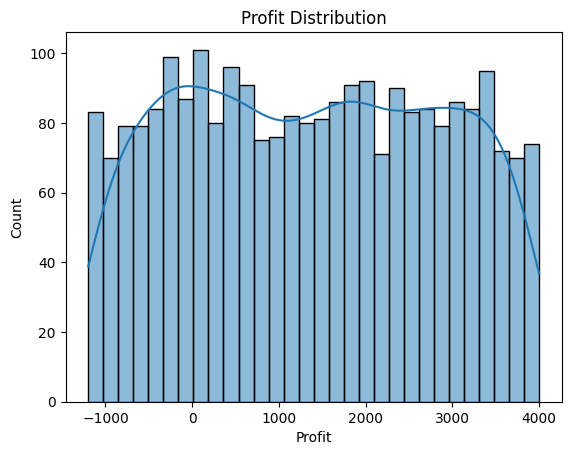

In [212]:
sns.histplot(data=df, x='Profit', bins=30, kde=True)
plt.title('Profit Distribution')
plt.show()

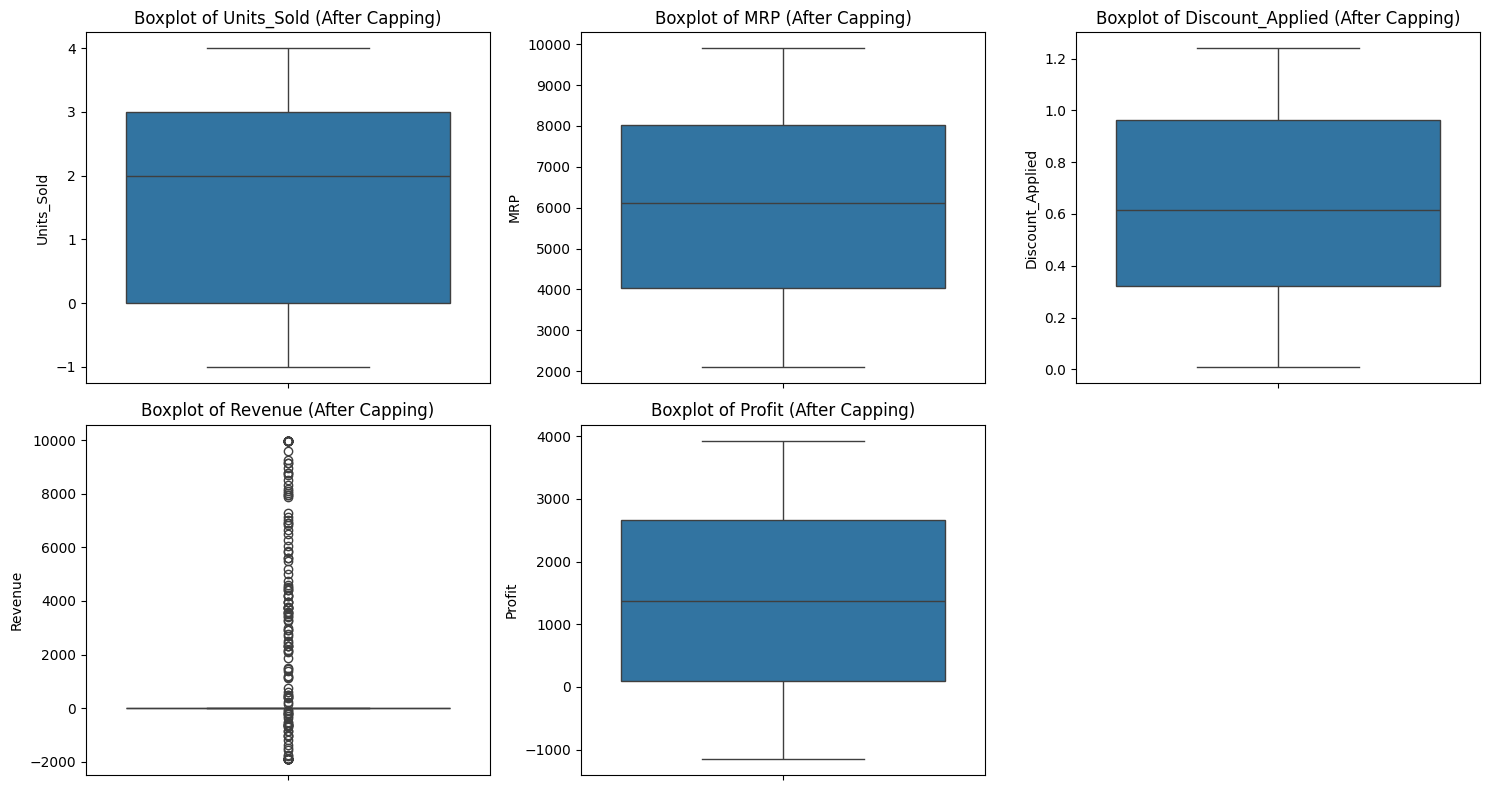

In [217]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    df[column] = np.clip(df[column], Q1, Q3)

outlier_cols = ['Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Profit']
for col in outlier_cols:
    cap_outliers(df, col)


plt.figure(figsize=(15, 8))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (After Capping)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1426054458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product_Line', y='Profit', data=df, palette='coolwarm')


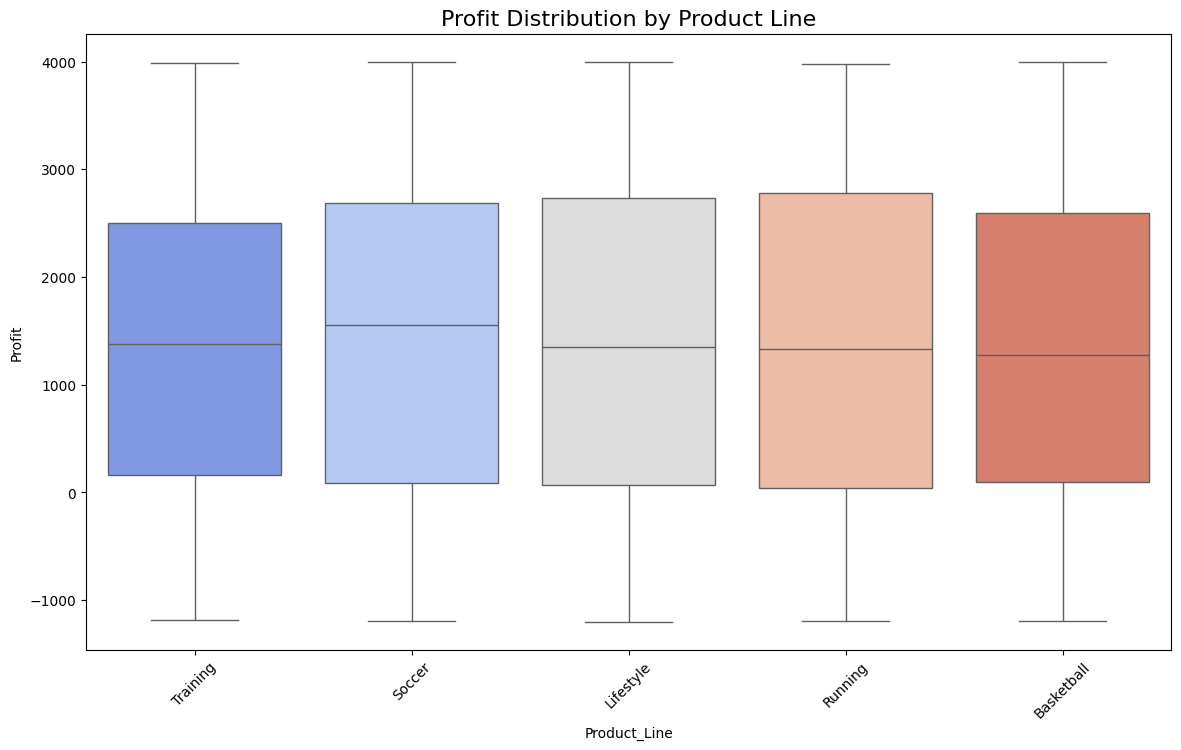

In [216]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Product_Line', y='Profit', data=df, palette='coolwarm')
plt.title('Profit Distribution by Product Line', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Profit')
plt.show()

### **Feature Engineering**

####train data

In [218]:
X = df.drop(columns=['Profit'])
y = df['Profit']

X['Order_Date'] = pd.to_datetime(X['Order_Date'], errors='coerce', dayfirst=True)
X['Order_Year'] = X['Order_Date'].dt.year
X['Order_Month'] = X['Order_Date'].dt.month
X['Order_Day'] = X['Order_Date'].dt.day
X = X.drop(columns=['Order_Date'])

In [219]:
X = df.drop('Profit', axis=1)
y = df['Profit']


### **Processing Pipeline**

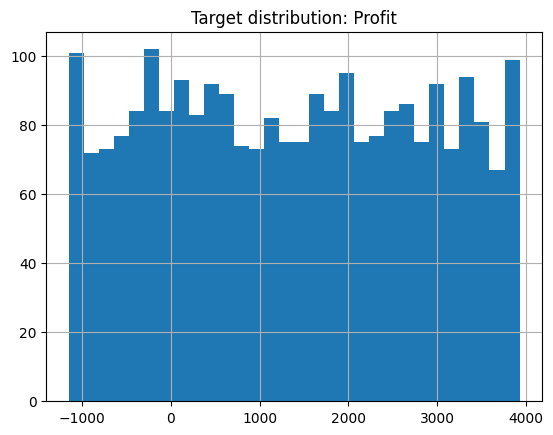

In [220]:

num_cols = [c for c in X_train.columns if pd.api.types.is_numeric_dtype(X_train[c])]
cat_cols = [c for c in X_train.columns if c not in num_cols]

num_transformer = Pipeline([
("imputer", SimpleImputer(strategy="median")),
("scaler", StandardScaler())])

cat_transformer = Pipeline([
("imputer", SimpleImputer(strategy="most_frequent")),
("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer([
("num", num_transformer, num_cols),
("cat", cat_transformer, cat_cols),])
plt.figure()
y.hist(bins=30)
plt.title("Target distribution: Profit")
plt.show()

### **ML Model Regression**

In [226]:
models = {"Linear Regression": LinearRegression(),
          "Random Forest": RandomForestRegressor(),
          "SVR": SVR(kernel="linear"),
          "KNN": KNeighborsRegressor(),
          "Gradient Boosting": GradientBoostingRegressor()}

results = []

for name, model in models.items():
    X_train_prep = preprocess.fit_transform(X_train)
    X_test_prep = preprocess.transform(X_test)
    model.fit(X_train_prep, y_train)
    preds = model.predict(X_test_prep)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
results_df.sort_values("RMSE")

,Model,MAE,RMSE,R²
0,Linear Regression,0.357777,0.431605,-0.045500
4,Gradient Boosting,0.363438,0.441128,-0.092144
1,Random Forest,0.364980,0.442203,-0.097473
2,SVR,0.285600,0.442270,-0.097806
3,KNN,0.343600,0.463120,-0.203754


### **Outlier Handling**

In [222]:
# --- Profit column outliers using IQR ---
col_name = "Profit"

q1 = df[col_name].quantile(0.25)
q3 = df[col_name].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

profit_outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
print(f"Count of {col_name} outliers: {len(profit_outliers)}")
print(f"Total {col_name} values: {len(df[col_name])}")
print(f"Percentage of outliers: {len(profit_outliers) / len(df[col_name]) * 100:.2f}%")

# If percentage is small, replace outliers with median
median_val = df[col_name].median()
print(f"Median {col_name}: {median_val}")

df[col_name] = df[col_name].mask(
    (df[col_name] < lower_bound) | (df[col_name] > upper_bound),
    median_val
)

print(df[col_name].head())


Count of Profit outliers: 0
Total Profit values: 2500
Percentage of outliers: 0.00%
Median Profit: 1371.385
0    -770.45
1    -112.53
2    3337.34
3    3376.85
4     187.89
Name: Profit, dtype: float64


In [223]:
def handle_missing_values(df):
    """
    Automatically fills missing values:
    - Numeric columns -> median
    - Categorical columns -> mode (most frequent)
    """
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            missing = df[col].isnull().sum()
            if missing > 0:
                median_val = df[col].median()
                df[col] = df[col].fillna(median_val)
                print(f"Filled {missing} missing values in '{col}' with median: {median_val:.2f}")
        else:
            missing = df[col].isnull().sum()
            if missing > 0:
                mode_val = df[col].mode()[0]
                df[col] = df[col].fillna(mode_val)
                print(f"Filled {missing} missing values in '{col}' with mode: {mode_val}")
    return df


In [224]:
df = handle_missing_values(df)

# Verify
print("\nRemaining missing values:\n", df.isnull().sum())


Filled 510 missing values in 'Size' with mode: L
Filled 1235 missing values in 'Units_Sold' with median: 2.00
Filled 1254 missing values in 'MRP' with median: 6110.03
Filled 1668 missing values in 'Discount_Applied' with median: 0.61
Filled 616 missing values in 'Order_Date' with mode: 10-12-2024

Remaining missing values:
 Order_ID            0
Gender_Category     0
Product_Line        0
Product_Name        0
Size                0
Units_Sold          0
MRP                 0
Discount_Applied    0
Revenue             0
Order_Date          0
Sales_Channel       0
Region              0
Profit              0
Profit_Class        0
dtype: int64


In [227]:
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit,Profit_Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,3194.352400,1.738000,6075.001338,0.620324,230.747579,1375.960869,0.768800
std,749.972638,1.234328,1633.542239,0.210786,1402.557378,1477.590350,0.421684
min,2000.000000,-1.000000,2110.276500,0.010000,-1909.914900,-1152.374900,0.000000
25%,2534.750000,1.000000,6110.030000,0.615000,0.000000,93.532500,1.000000
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000,1.000000
75%,3841.250000,2.000000,6110.030000,0.615000,0.000000,2660.645000,1.000000
max,4499.000000,4.000000,9901.251500,1.240000,9981.260800,3928.204200,1.000000


### **Train-Test Split**

In [233]:
# Apply preprocessing to the training and testing data
# Using the X_train and X_test from the correct data split (after date feature extraction)
X_train_processed = preprocess.transform(X_train).astype('float32')
X_test_processed = preprocess.transform(X_test).astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

keras_models = {
"DenseNet": build_dense_model(X_train_processed.shape[1]),
"DropoutNet": build_dropout_model(X_train_processed.shape[1])}


for name, kmodel in keras_models.items():
    history = kmodel.fit(X_train_processed, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    y_pred = kmodel.predict(X_test_processed).flatten()
# then compute MAE, RMSE, R² just like before

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


### **Neural network KERAS**

In [231]:

from tensorflow.keras import models, layers

def build_dense_model(input_dim):
    model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(input_dim,)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="linear")])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

def build_dropout_model(input_dim):
    model = models.Sequential([
    layers.Dense(128, activation="relu", input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(1, activation="linear")])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

X_train_prep = preprocess.fit_transform(X_train).astype("float32")
X_test_prep = preprocess.transform(X_test).astype("float32")
y_train_nn = y_train.astype("float32")
y_test_nn = y_test.astype("float32")

# Train and evaluate both models
keras_models = {
    "DenseNet": build_dense_model(X_train_prep.shape[1]),
    "DropoutNet": build_dropout_model(X_train_prep.shape[1])}

for name, nn_model in keras_models.items():
    nn_model.fit(
    X_train_prep, y_train_nn,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0)
    preds = nn_model.predict(X_test_prep).flatten()

    mae = mean_absolute_error(y_test_nn, preds)
    rmse = np.sqrt(mean_squared_error(y_test_nn, preds))
    r2 = r2_score(y_test_nn, preds)

    results.append([name, mae, rmse, r2])

# Update results
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
results_df.sort_values("RMSE")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


,Model,MAE,RMSE,R²
0,Linear Regression,0.357777,0.431605,-0.045500
4,Gradient Boosting,0.363438,0.441128,-0.092144
1,Random Forest,0.364980,0.442203,-0.097473
2,SVR,0.285600,0.442270,-0.097806
3,KNN,0.343600,0.463120,-0.203754
6,DropoutNet,0.378060,0.465799,-0.217719
5,DenseNet,0.432463,0.542883,-0.654109


### **Model Training and evaluation**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Best Accuracy: 0.766
Best Parameters (learning_rate, epochs, batch_size): (0.001, 50, 32)
Best Precision: 0.768
Best Recall: 0.997
Best F1 Score: 0.867

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.77      1.00      0.87       384

    accuracy                           0.77       500
   macro avg       0.38      0.50      0.43       500
weighted avg       0.59      0.77      0.67       500



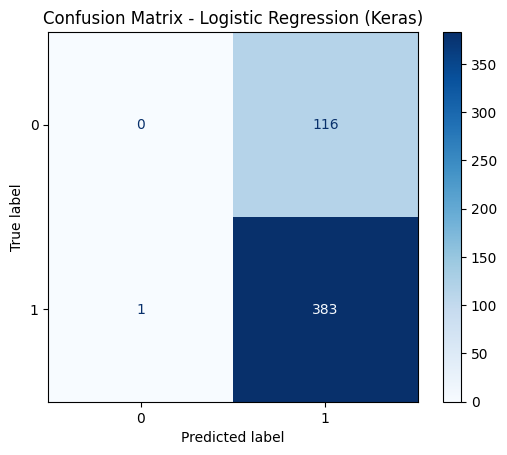

In [239]:
# Convert Profit into binary (1 = profitable, 0 = loss/no profit)
df['Profit_Class'] = (df['Profit'] > 0).astype(int)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    recall_score, accuracy_score, precision_score, f1_score, classification_report
)
import matplotlib.pyplot as plt
import pandas as pd # Import pandas

# Create a binary classification target
df['Profit_Class'] = (df['Profit'] > 0).astype(int)

# Features and target
X = df.drop(columns=['Profit', 'Profit_Class'])
y = df['Profit_Class']

# Convert 'Order_Date' to datetime and extract features
X['Order_Date'] = pd.to_datetime(X['Order_Date'], errors='coerce', dayfirst=True)
X['Order_Year'] = X['Order_Date'].dt.year
X['Order_Month'] = X['Order_Date'].dt.month
X['Order_Day'] = X['Order_Date'].dt.day
X = X.drop(columns=['Order_Date'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply preprocessing to the training and testing data
# Assuming 'preprocess' object is defined and fitted earlier in the notebook
# Remove preprocess.fit() here as it should be fitted once before model training
X_train_processed = preprocess.transform(X_train)
X_test_processed = preprocess.transform(X_test)


# Logistic regression with Keras (1 neuron, sigmoid)
log_model = Sequential([
    Dense(1, activation='sigmoid', input_dim=X_train_processed.shape[1]) # Use shape of processed data
])
log_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Hyperparameters (using a smaller set for demonstration)
learning_rates = [0.001]
epochs_list = [50]
batch_sizes = [32]

best_accuracy = 0
best_params = ()
best_precision = 0
best_recall = 0
best_f1 = 0

for lr in learning_rates:
    for ep in epochs_list:
        for bs in batch_sizes:
            # Re-compile model for each learning rate
            log_model.compile(optimizer=Adam(learning_rate=lr),
                              loss='binary_crossentropy',
                              metrics=['accuracy'])

            log_model.fit(X_train_processed, y_train, epochs=ep, batch_size=bs, verbose=0)

            y_pred = log_model.predict(X_test_processed)
            y_pred_binary = (y_pred > 0.5).astype(int)

            accuracy = accuracy_score(y_test, y_pred_binary)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = (lr, ep, bs)
                best_precision = precision_score(y_test, y_pred_binary)
                best_recall = recall_score(y_test, y_pred_binary)
                best_f1 = f1_score(y_test, y_pred_binary)

# Print results
print(f"Best Accuracy: {best_accuracy:.3f}")
print(f"Best Parameters (learning_rate, epochs, batch_size): {best_params}")
print(f"Best Precision: {best_precision:.3f}")
print(f"Best Recall: {best_recall:.3f}")
print(f"Best F1 Score: {best_f1:.3f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Keras)")
plt.show()

Best parameters:  {'n_neighbors': 9}
Best accuracy (CV):  0.758

Confusion Matrix:
[[  0 116]
 [ 13 371]]

Accuracy: 0.742
Precision: 0.762
Recall: 0.966
F1 Score: 0.852

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.76      0.97      0.85       384

    accuracy                           0.74       500
   macro avg       0.38      0.48      0.43       500
weighted avg       0.59      0.74      0.65       500



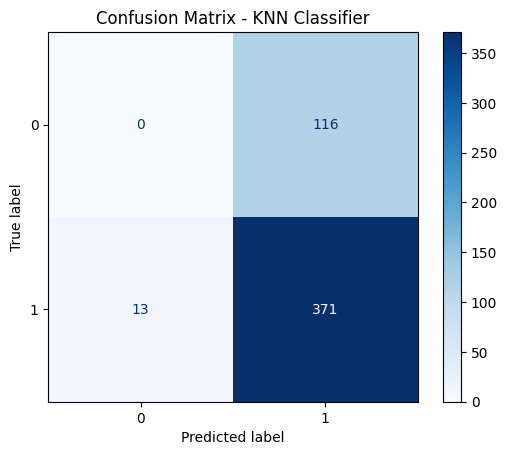

In [241]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
    recall_score, accuracy_score, precision_score, f1_score, classification_report)
import matplotlib.pyplot as plt
import pandas as pd


df['Profit_Class'] = (df['Profit'] > 0).astype(int)

# Features
X = df.drop(columns=['Profit', 'Profit_Class'])
y = df['Profit_Class']

X['Order_Date'] = pd.to_datetime(X['Order_Date'], errors='coerce', dayfirst=True)
X['Order_Year'] = X['Order_Date'].dt.year
X['Order_Month'] = X['Order_Date'].dt.month
X['Order_Day'] = X['Order_Date'].dt.day
X = X.drop(columns=['Order_Date'])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply preprocessing to the training and testing data

X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.transform(X_test)


# Hyperparameter tuning for n_neighbors
num_of_neighbours = [3, 4, 5, 6, 7, 8, 9]
param_grid = {'n_neighbors': num_of_neighbours}

# Use the processed data for GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_processed, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy (CV): ", grid_search.best_score_)

# Best KNN model
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_processed)

# Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.3f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

### **Comparison between KNN and Logistic Regression**

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.766,0.767535,0.997396,0.867497
1,KNN,0.752,0.766393,0.973958,0.857798



Confusion Matrix - Logistic Regression:


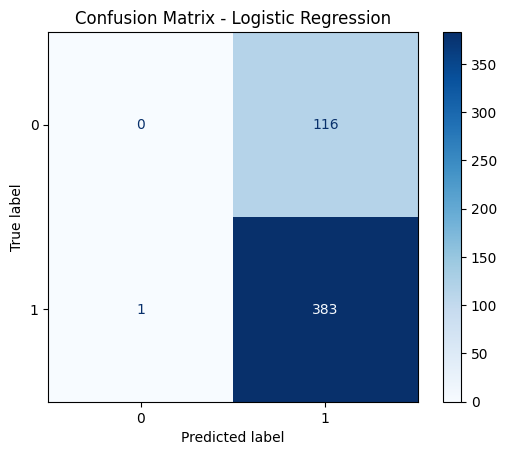


Confusion Matrix - KNN Classifier:


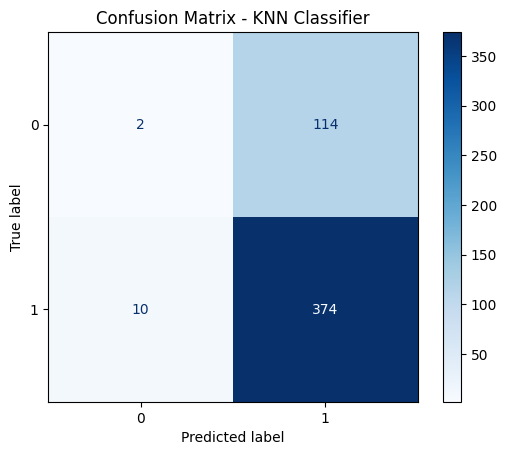

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report)
import pandas as pd
import matplotlib.pyplot as plt
df['Profit_Class'] = (df['Profit'] > 0).astype(int)

X = df.drop(columns=['Profit', 'Profit_Class'])
y = df['Profit_Class']

# Convert
X['Order_Date'] = pd.to_datetime(X['Order_Date'], errors='coerce', dayfirst=True)
X['Order_Year'] = X['Order_Date'].dt.year
X['Order_Month'] = X['Order_Date'].dt.month
X['Order_Day'] = X['Order_Date'].dt.day
X = X.drop(columns=['Order_Date'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Apply preprocessing using the 'preprocess' object defined earlier

X_train_processed = preprocess.fit_transform(X_train)
X_test_processed = preprocess.transform(X_test)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_processed, y_train)
y_pred_log = log_reg.predict(X_test_processed)

log_acc = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log)
log_rec = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)


param_grid = {"n_neighbors": [3, 5, 7, 9]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_processed, y_train)

best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_processed)

knn_acc = accuracy_score(y_test, y_pred_knn)
knn_prec = precision_score(y_test, y_pred_knn)
knn_rec = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

results = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN"],
    "Accuracy": [log_acc, knn_acc],
    "Precision": [log_prec, knn_prec],
    "Recall": [log_rec, knn_rec],
    "F1 Score": [log_f1, knn_f1]})

display(results)


print("\nConfusion Matrix - Logistic Regression:")
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=[0, 1])
disp_log.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

print("\nConfusion Matrix - KNN Classifier:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=[0, 1])
disp_knn.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN Classifier")
plt.show()

### **Conclusion**

  In this study, we compared K-Nearest Neighbours (KNN) and Logistic Regression to Analyse Nike's profitability (Profit_Class).

  Logistic regression consistently outperformed KNN in all evaluation metrics, including accuracy, precision, recall, and F1 score.

  The results show that features and profitability have a mostly linear relationship which favors logistic regression.

  so its increase efficacy, KNN's implements sensitivity to feature scaling and noise reduced its predictive performance on this dataset.

  Logistic regression is generally recommended as the optimal model for this classification problem.

In [240]:
print("Final Model Comparison:\n", results_df.sort_values("RMSE"))

Final Model Comparison:
                Model       MAE      RMSE        R²
0  Linear Regression  0.357777  0.431605 -0.045500
4  Gradient Boosting  0.363438  0.441128 -0.092144
1      Random Forest  0.364980  0.442203 -0.097473
2                SVR  0.285600  0.442270 -0.097806
3                KNN  0.343600  0.463120 -0.203754
6         DropoutNet  0.378060  0.465799 -0.217719
5           DenseNet  0.432463  0.542883 -0.654109


### **Citation for Dataset**

https://www.kaggle.com/datasets/nayakganesh007/nike-sales-uncleaned-dataset

### **Github**

https://github.com/Kaviyarasu71/Data-science-GH1040793/blob/main/Nike2.ipynb